In [1]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/hemispace'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets, masking
import nibabel as nib
import pdb
import os


In [24]:
data_dir = '/lab_data/behrmannlab/vlad/hemispace'


sub_list=["hemispace1001", "hemispace1002", "hemispace1003","hemispace1004","hemispace1006","hemispace1007",
"hemispace2001", "hemispace2002", "hemispace2003",
"025", "038", "057", "059", "064", "067", "068", "071", "083", "084", "085", 
"087", "088", "093", "094", "095", "096", "097", "103", "104", "105", "106", "107", 
"spaceloc1001", "spaceloc1002", "spaceloc1003", "spaceloc1004", "spaceloc1005", "spaceloc1006",
    "spaceloc1007", "spaceloc1008", "spaceloc1009", "spaceloc1010", "spaceloc1011", "spaceloc1012",
	 "spaceloc2013", "spaceloc2014", "spaceloc2015", "spaceloc2016", "spaceloc2017", "spaceloc2018" ]

hemi = ['right','left','right','']

sub_info = pd.read_csv('sub_info.csv')



tasks = ['spaceloc', 'toolloc', 'loc']
conds = [['space'],['tool'],['face','word']]
copes = [[1],[1],[1,4]]

rois = ["dorsal_visual_cortex", "ventral_visual_cortex"]

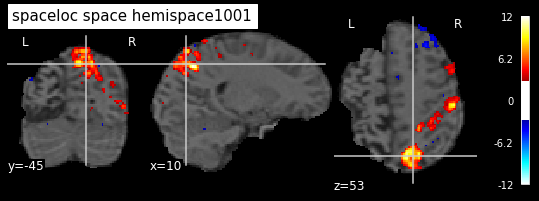

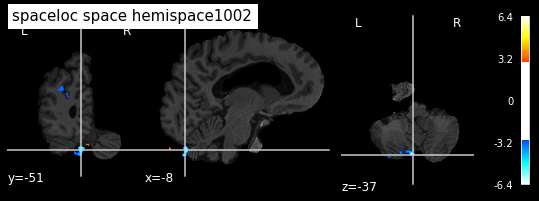

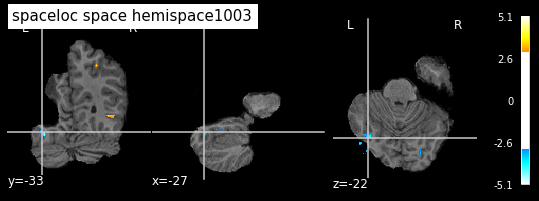

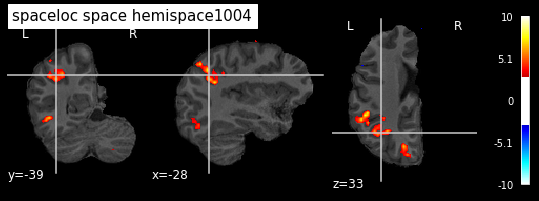

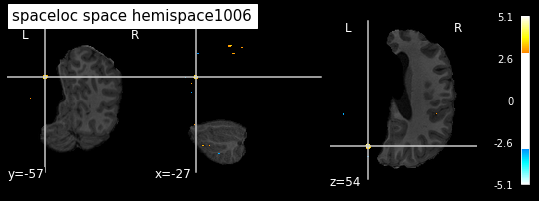

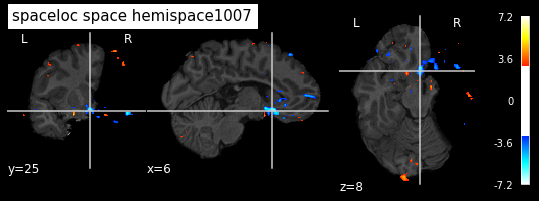

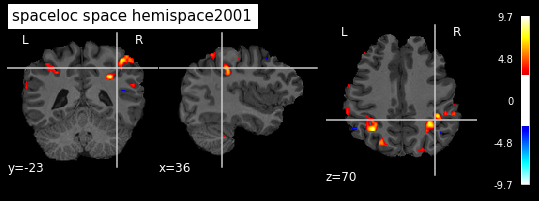

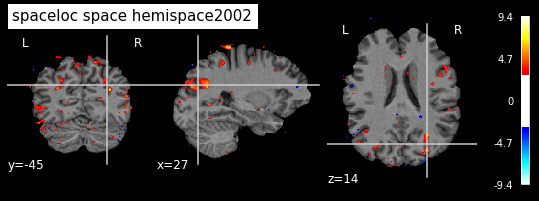

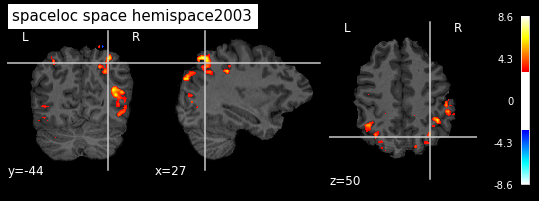

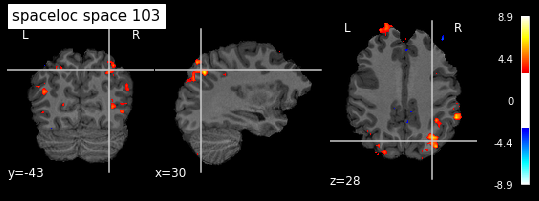

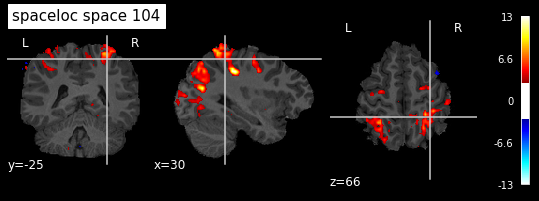

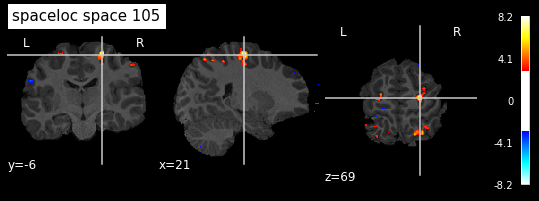

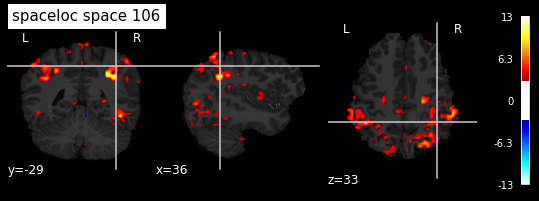

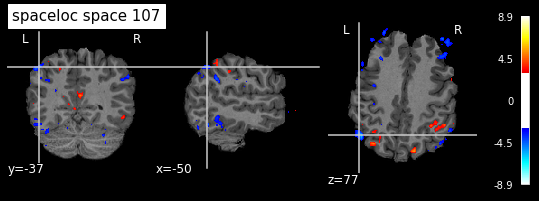

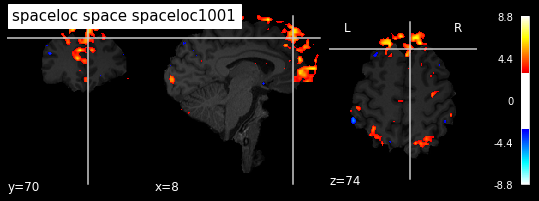

KeyboardInterrupt: 

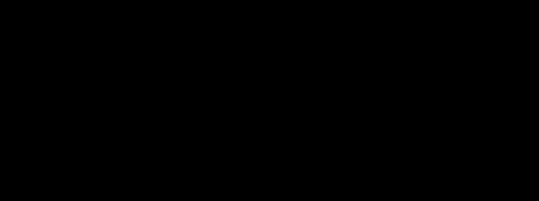

In [23]:
"""
Check spaceloc funcs for all subs
"""

for task in tasks:
    for cond_ind, cond in enumerate(conds[tasks.index(task)]):
        for sub in sub_info['sub']:

            if sub[0:4] =='sub-':
                sub = sub[4:]
            #check if task folder exists
            if os.path.exists(f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}'):
            
                anat_file = f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain.nii.gz'
                stat_file = f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}/HighLevel.gfeat/cope{copes[tasks.index(task)][cond_ind]}.feat/stats/zstat1.nii.gz'
                plotting.plot_stat_map(stat_file, bg_img=anat_file, threshold=2.95, title=f'{task} {cond} {sub}')
                #save figure
                plt.savefig(f'{curr_dir}/qc/{sub}_{task}_{cond}.jpg')
                
                plt.pause(.001)

                    
                
            else:
                print(f'{task} folder does not exist for {sub}')
                


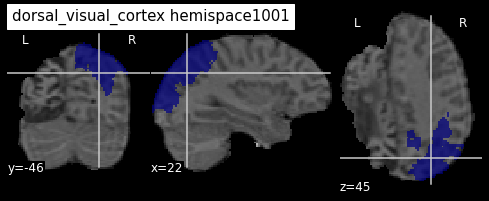

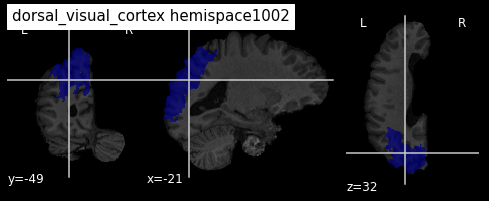

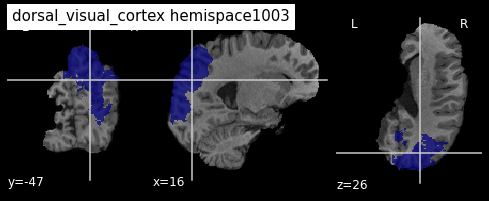

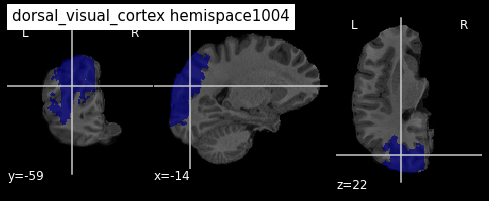

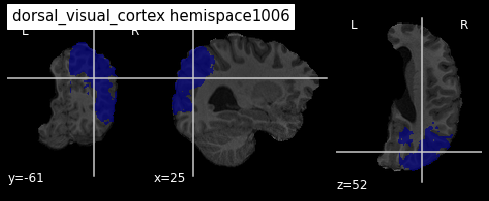

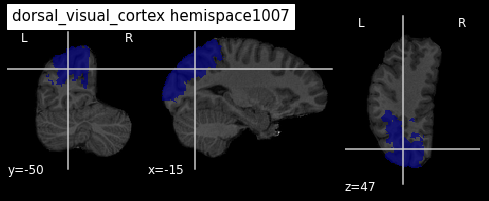

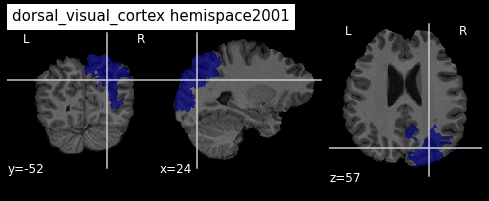

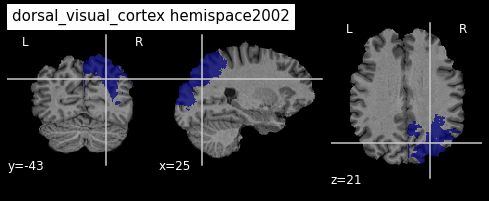

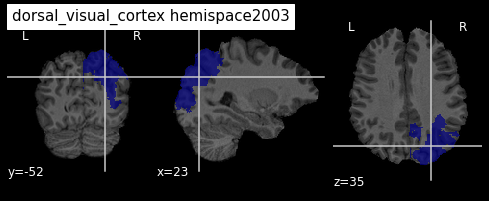

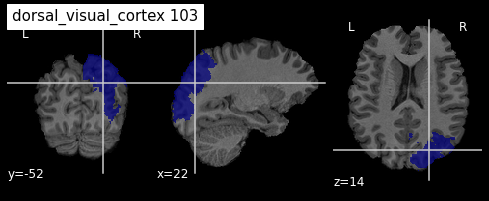

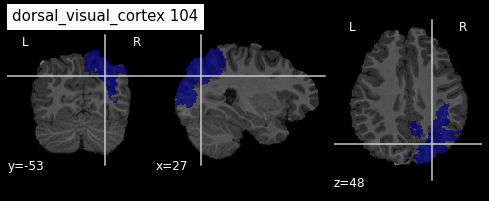

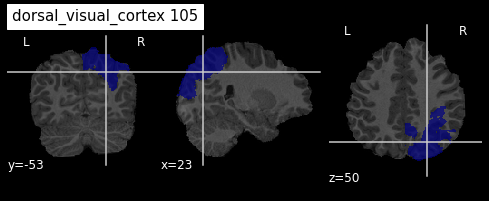

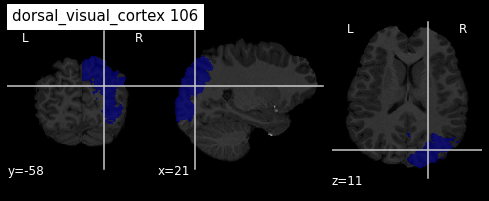

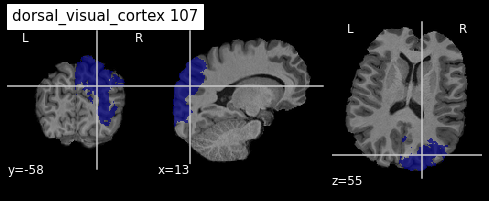

ValueError: File not found: '/lab_data/behrmannlab/vlad/hemispace/sub-spaceloc1001/ses-01/anat/sub-spaceloc1001_ses-01_T1w_brain_mask_right.nii.gz'

In [25]:
"""Visualize Dorsal and ventral rois on subs"""


for roi in rois:
    for sub,hemi in zip(sub_info['sub'],sub_info['intact_hemi']):
        if sub[0:4] =='sub-':
            sub = sub[4:]

        if hemi == 'right':
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')
        elif hemi == 'left':
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_left.nii.gz')
        else:
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')

        #anat_mask =image.get_data(anat_mask)
        anat_file = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain.nii.gz')
        #stat_file = image.get_data(image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}/HighLevel.gfeat/cope{copes[tasks.index(task)][cond_ind]}.feat/stats/zstat1.nii.gz'))
        parcel_file = image.binarize_img(image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/rois/parcels/{roi}.nii.gz'), threshold =.5, mask_img = anat_mask)

        #affine = anat_file.affine

        #parcel_file = anat_mask * parcel_file

        #parcel_file = nib.Nifti1Image(parcel_file, affine)

        #parcel_file = image.binarize_img(parcel_file)

        plotting.plot_roi(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')
        plt.savefig(f'{curr_dir}/qc/{sub}_{roi}.jpg')
        plt.pause(.001)



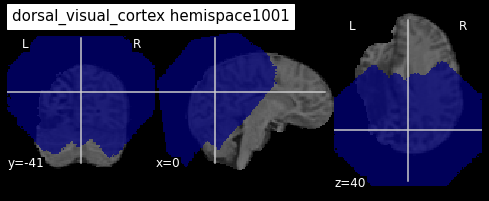

In [18]:
anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')
parcel_file = image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/rois/parcels/{roi}.nii.gz')
parcel_file = image.binarize_img(parcel_file,threshold=0)
plotting.plot_roi(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')



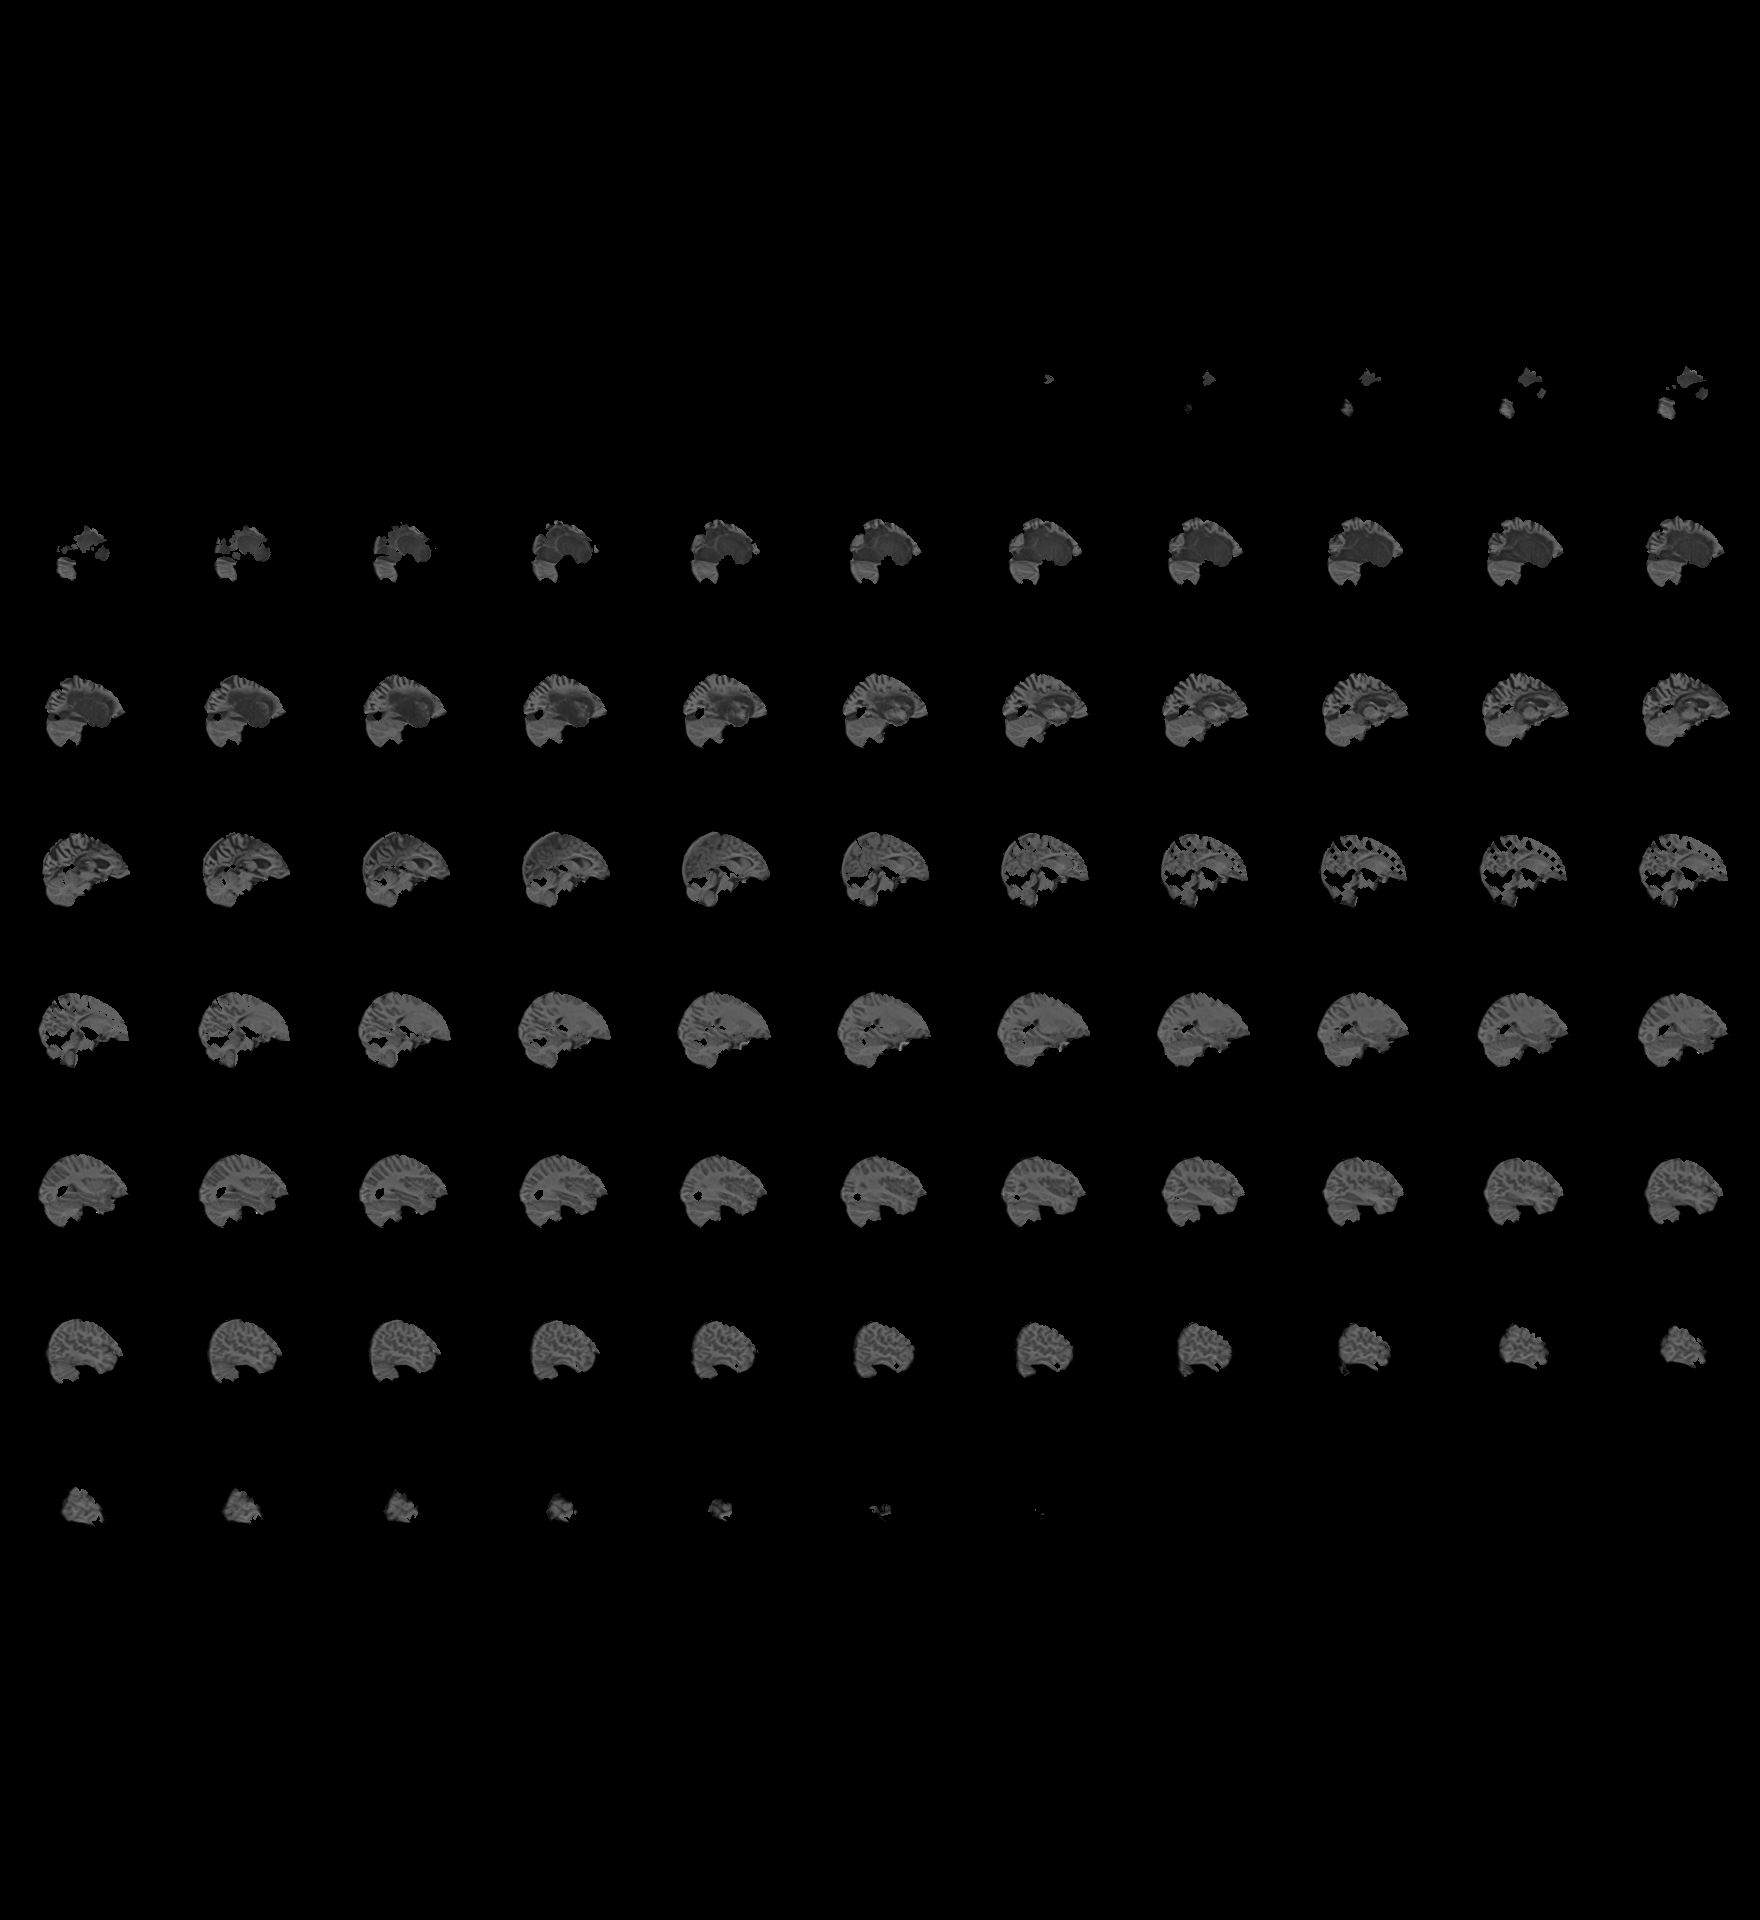
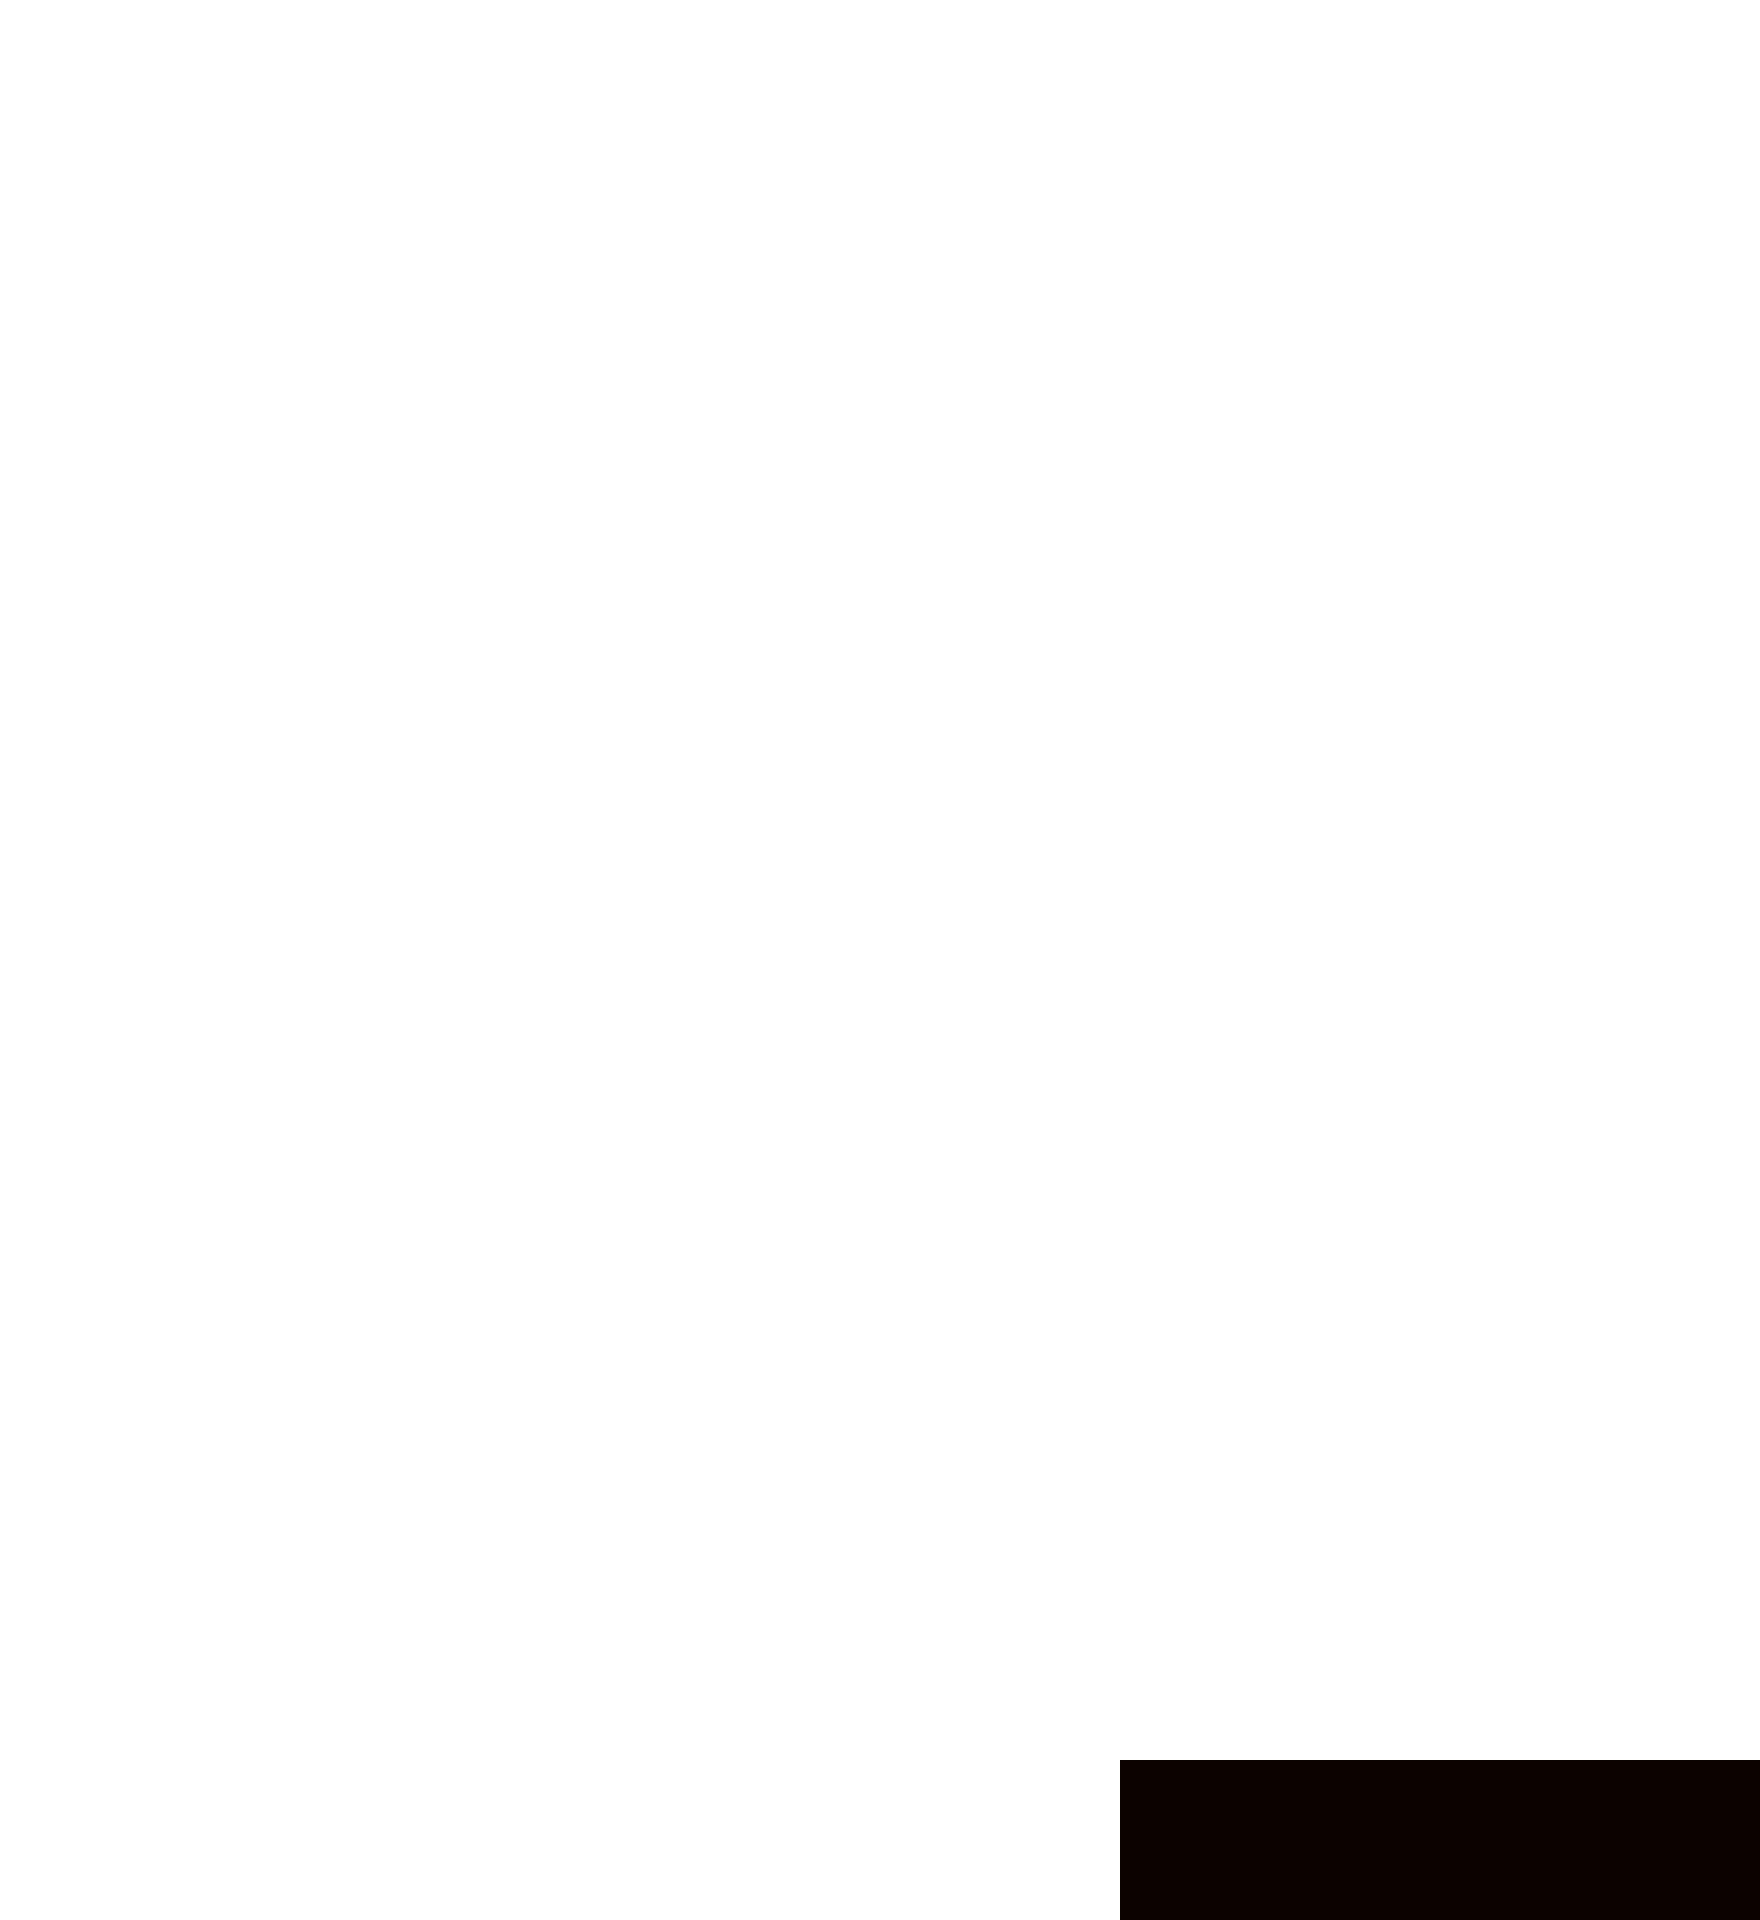

In [17]:
parcel_file = image.binarize_img(parcel_file,threshold=0)
plotting.view_img(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')

In [19]:
sub

'hemispace1001'